In [1]:
import pandas
import numpy 
import matplotlib
import seaborn

In [2]:
matplotlib.pyplot.style.use('ggplot')

In [3]:
historical = pandas.read_csv('HistoricalEsportData.csv')
genereal = pandas.read_csv('GeneralEsportData.csv')

In [4]:
historical

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-05-01,QuakeWorld,300.0,3,1
3,1998-07-01,Quake II,15000.0,5,1
4,1998-07-01,QuakeWorld,6500.0,4,1
...,...,...,...,...,...
8553,2023-01-01,Age of Empires Online,460.0,3,2
8554,2023-01-01,F1 22,324.0,3,1
8555,2023-01-01,Age of Mythology,240.0,4,2
8556,2023-01-01,Diabotical,170.0,5,8


In [5]:
historical['Game'].value_counts()

WarCraft III                           202
Super Smash Bros. Melee                200
Age of Empires II                      196
StarCraft: Brood War                   175
StarCraft II                           156
                                      ... 
Supreme Commander                        1
S.T.A.L.K.E.R.: Shadow of Chernobyl      1
Ultra Fight Da! Kyanta 2                 1
Fighter's History Dynamite               1
FIFA 23                                  1
Name: Game, Length: 577, dtype: int64

In [6]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8558 non-null   object 
 1   Game         8558 non-null   object 
 2   Earnings     8558 non-null   float64
 3   Players      8558 non-null   int64  
 4   Tournaments  8558 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 334.4+ KB


In [7]:
#date is string lets reform this column to a date type

In [8]:
historical['Date']=pandas.to_datetime(historical['Date'])

In [9]:
historical[historical['Game']=='WarCraft III'].sort_values(by='Earnings',ascending=False)

,Date,Game,Earnings,Players,Tournaments
671,2007-08-01,WarCraft III,122722.97,53,11
3177,2015-12-01,WarCraft III,112682.24,13,7
907,2008-11-01,WarCraft III,112582.55,28,13
601,2007-03-01,WarCraft III,112407.18,16,6
362,2005-07-01,WarCraft III,109679.71,30,8
...,...,...,...,...,...
1343,2010-12-01,WarCraft III,398.28,3,3
3050,2015-09-01,WarCraft III,370.07,3,4
2917,2015-06-01,WarCraft III,360.93,6,7
2819,2015-04-01,WarCraft III,129.46,2,1


In [10]:
historical[historical['Game']=='WarCraft III'].sort_values(by='Earnings',ascending=False).set_index('Date')['Earnings']

Date
2007-08-01    122722.97
2015-12-01    112682.24
2008-11-01    112582.55
2007-03-01    112407.18
2005-07-01    109679.71
                ...    
2010-12-01       398.28
2015-09-01       370.07
2015-06-01       360.93
2015-04-01       129.46
2002-11-01       106.00
Name: Earnings, Length: 202, dtype: float64

In [11]:

historical[historical['Game']=='WarCraft III'].sort_values(by='Date',ascending=False).set_index('Date')['Earnings']

Date
2020-01-01    72425.80
2019-12-01     2040.00
2019-11-01    85930.00
2019-10-01    22374.20
2019-09-01    20459.60
                ...   
2003-03-01     8081.27
2003-01-01     9185.00
2002-12-01    42702.25
2002-11-01      106.00
2002-09-01    31932.40
Name: Earnings, Length: 202, dtype: float64

<AxesSubplot: xlabel='Date'>

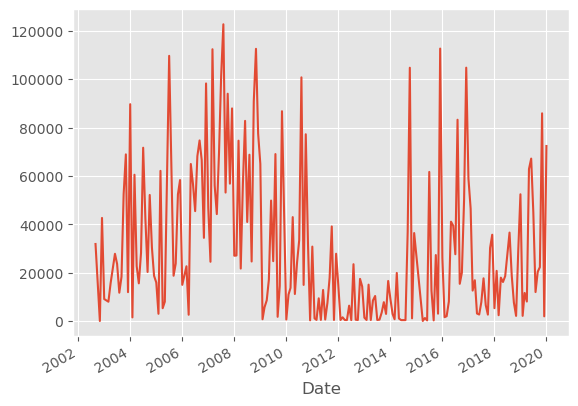

In [12]:

historical[historical['Game']=='WarCraft III'].sort_values(by='Earnings',ascending=False).set_index('Date')['Earnings'].plot()

<AxesSubplot: xlabel='Date'>

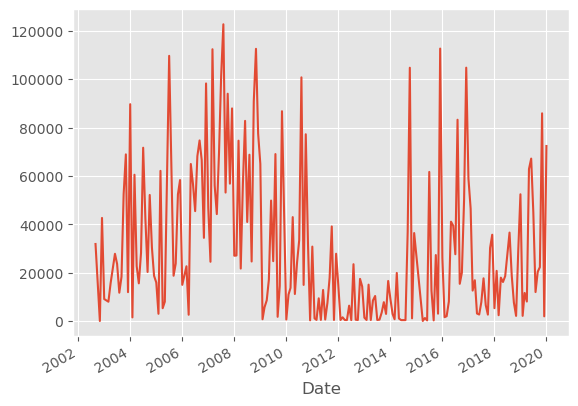

In [13]:

historical[historical['Game']=='WarCraft III'].sort_values(by='Date',ascending=False).set_index('Date')['Earnings'].plot()

<AxesSubplot: xlabel='Date'>

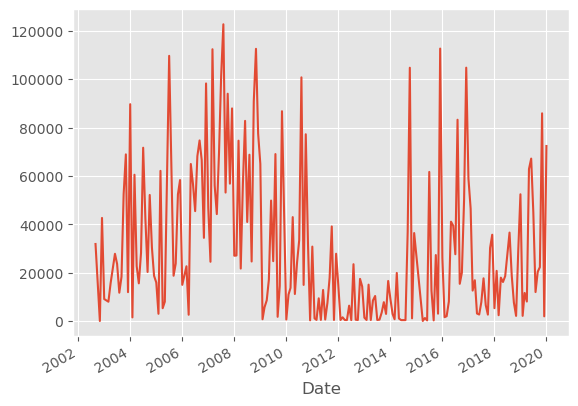

In [14]:

historical[historical['Game']=='WarCraft III'].set_index('Date')['Earnings'].plot()

All the 3 commands gave us the same diagram , so the sort doesnt affect the plot at all.
In this plot we see the earnings from warcraft through the years. Its pretty balanced except a big
fall betwenn 2011 and 2014. 

In [15]:
#lets see some more game 
historical.sort_values(by='Earnings',ascending=False)['Game'].drop_duplicates().head(5)
#TIP : if there are commands too looooong to understand you should always split them step by step
#eg : 
# 1)historical.sort_values(by='Earnings',ascending=False)
# 2)historical.sort_values(by='Earnings',ascending=False)['Game']
# 3)historical.sort_values(by='Earnings',ascending=False)['Game'].drop_duplicates()

7579                                  Dota 2
5610                                Fortnite
8013                          Arena of Valor
8014            League of Legends: Wild Rift
8207    PLAYERUNKNOWN'S BATTLEGROUNDS Mobile
Name: Game, dtype: object

In [16]:
top5 = historical.sort_values(by='Earnings',ascending=False)['Game'].drop_duplicates().head(5)

In [17]:
top5.iloc[1]

'Fortnite'

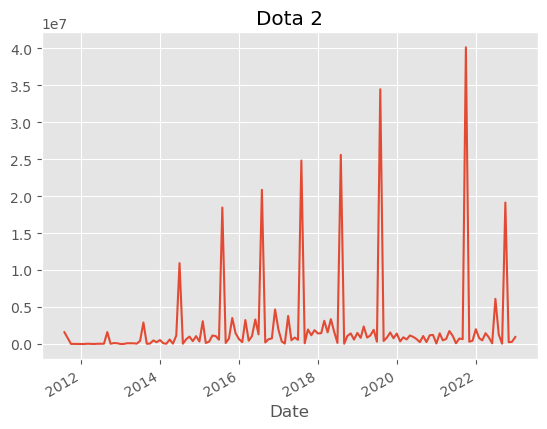

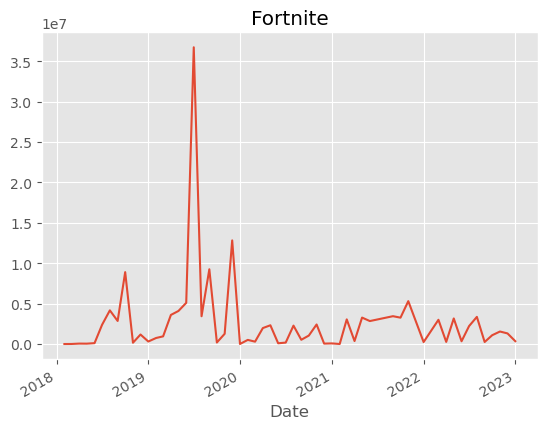

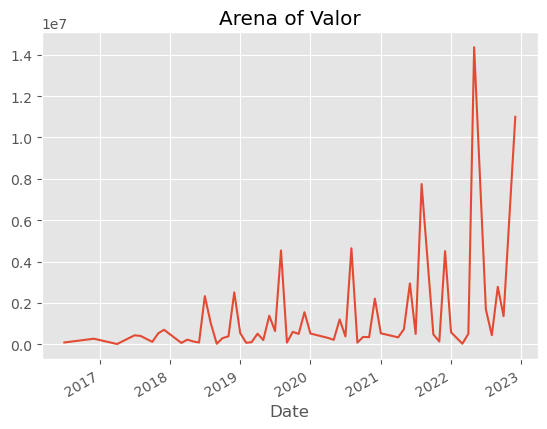

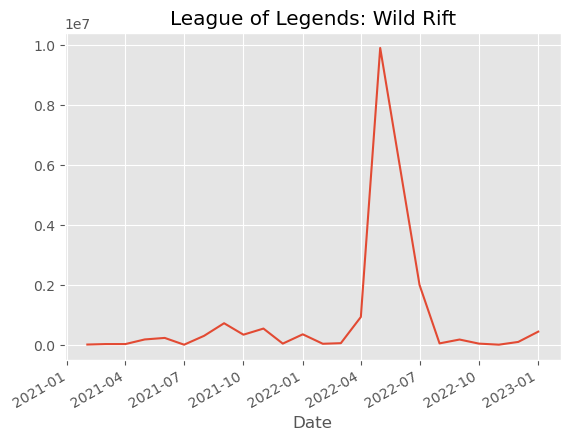

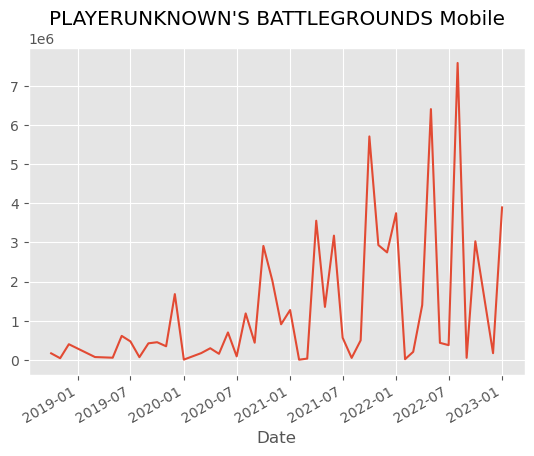

In [18]:
for gamename in top5: 
    historical[historical['Game']==gamename].set_index('Date')['Earnings'].plot(title=gamename)
    matplotlib.pyplot.show()

There are games likes Dota 2 and Battleground that have their ups and downs and there are games like
Fortinite having a peak and then disappearing.

There are games, such as Dota 2 and Battlegrounds, that experience fluctuations in popularity, while others like Fortnite may have a surge in popularity followed by a decline.

In [19]:
historical['Year']=historical['Date'].dt.year

In [20]:
historical.groupby(['Year','Game'])['Earnings'].sum()

Year  Game                      
1998  Age of Empires                  2000.0
      Quake II                       66200.0
      QuakeWorld                     43800.0
      StarCraft: Brood War           20000.0
1999  Descent 3                      50000.0
                                      ...   
2023  Super Smash Bros. Ultimate     14250.0
      Tekken 7                       16800.0
      Trackmania (2020)               3510.4
      osu!                            1225.0
      rFactor 2                     198300.0
Name: Earnings, Length: 1932, dtype: float64

In [21]:
historical.groupby(['Year','Game'])['Earnings'].sum()[1998]

Game
Age of Empires           2000.0
Quake II                66200.0
QuakeWorld              43800.0
StarCraft: Brood War    20000.0
Name: Earnings, dtype: float64

In [22]:
historical.groupby(['Year','Game'])['Earnings'].sum()[1998]['Age of Empires']

2000.0

In [23]:
historical.groupby(['Year','Game'])['Earnings'].sum().sort_values(ascending = False)

Year  Game                          
2019  Fortnite                          78530254.01
2021  Dota 2                            47959899.31
2019  Dota 2                            47061634.99
2018  Dota 2                            41532197.26
2017  Dota 2                            38074599.32
                                           ...     
2005  Marvel vs. Capcom 2                      0.00
2014  Soul Calibur II HD Online                0.00
2005  Project Gotham Racing 2                  0.00
      Street Fighter III: 3rd Strike           0.00
2015  Marvel vs. Capcom 2                      0.00
Name: Earnings, Length: 1932, dtype: float64

In [24]:
top10=historical.sort_values(by='Earnings',ascending=False).drop_duplicates(['Game']).head(10)
#top 10 games in earnings(each game only once)

In [25]:
top10

,Date,Game,Earnings,Players,Tournaments,Year
7579,2021-10-01,Dota 2,40138651.26,217,5,2021
5610,2019-07-01,Fortnite,36713555.90,785,33,2019
8013,2022-05-01,Arena of Valor,14361827.72,291,100,2022
8014,2022-05-01,League of Legends: Wild Rift,9904198.68,306,93,2022
8207,2022-08-01,PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,7579007.48,523,8,2022
7103,2021-03-01,PLAYERUNKNOWN’S BATTLEGROUNDS,7129813.46,167,5,2021
5055,2018-11-01,League of Legends,6680982.54,362,15,2018
6580,2020-08-01,Call of Duty: Modern Warfare,5100000.00,286,4,2020
7513,2021-09-01,Counter-Strike: Global Offensive,3948859.42,726,33,2021
5792,2019-09-01,Overwatch,3811048.85,212,5,2019


<AxesSubplot: xlabel='Earnings', ylabel='Game'>

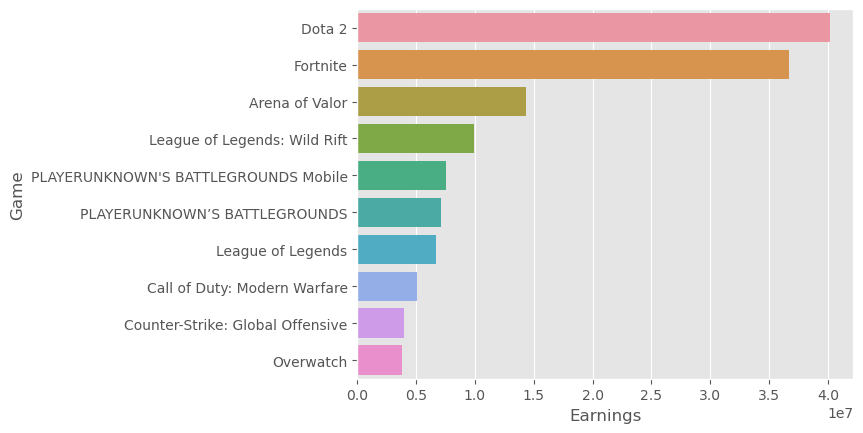

In [26]:
seaborn.barplot(data=top10 ,y='Game' , x='Earnings')

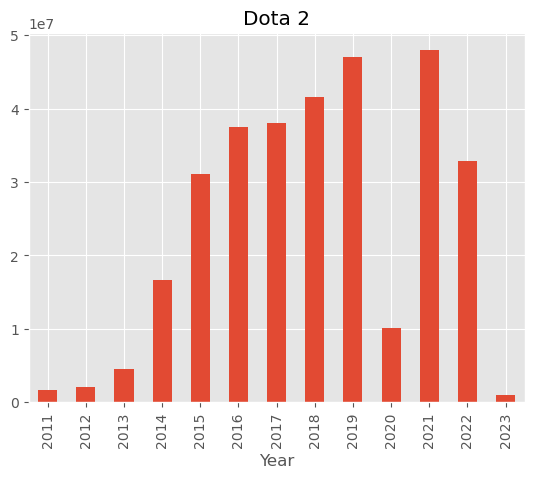

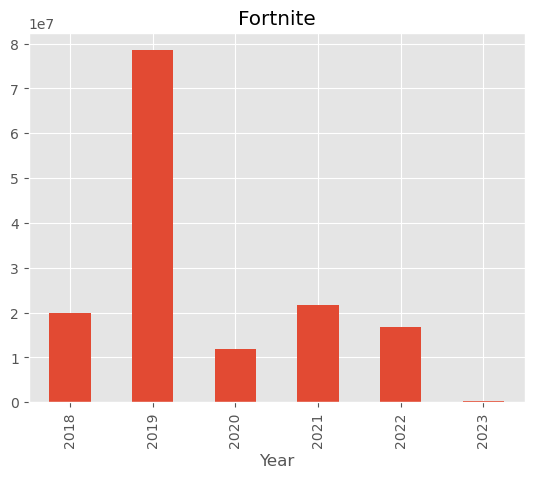

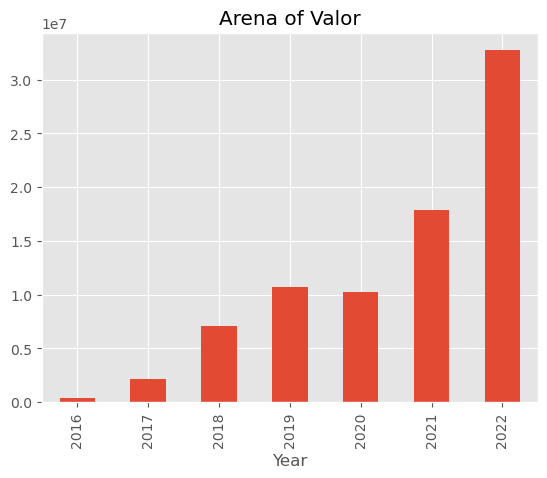

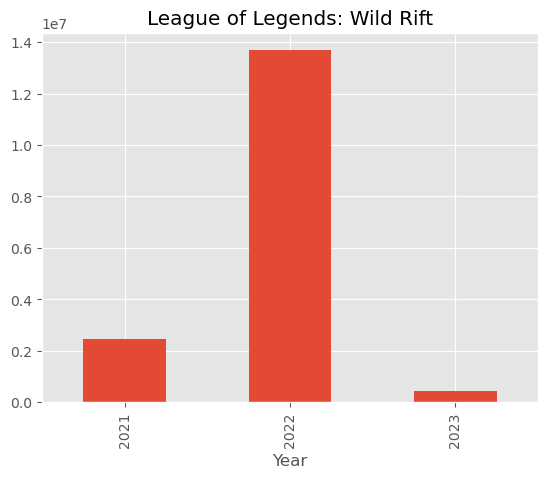

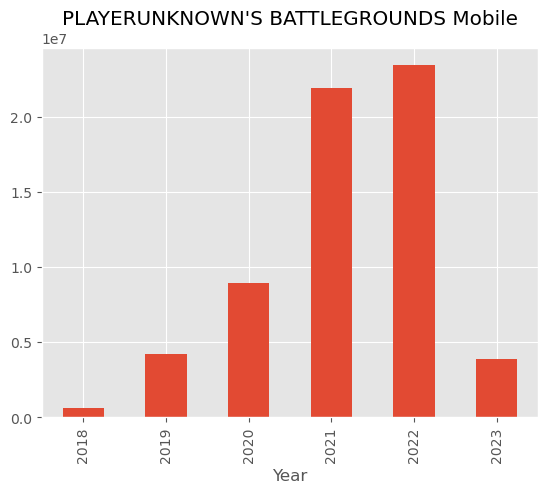

In [27]:
for gamename in top5: 
    historical[historical['Game']==gamename].set_index('Date').groupby('Year')['Earnings'].sum().plot(title=gamename,kind='bar')
    matplotlib.pyplot.show()

In [28]:
genereal['Game'].value_counts()

Resistance 2          2
Zula                  2
Age of Empires        1
Forza Motorsport 4    1
F1 2019               1
                     ..
Onmyoji Arena         1
Pokemon Unite         1
Roblox                1
Shards of War         1
osu!                  1
Name: Game, Length: 627, dtype: int64

In [29]:
genereal


,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,444285.71,321936.22,396,219
1,Age of Empires II,1999,Strategy,2908907.99,1040533.59,1825,1425
2,Age of Empires III,2005,Strategy,113893.65,41800.00,164,141
3,Age of Empires IV,2021,Strategy,816785.68,408438.41,411,247
4,Age of Empires Online,2011,Strategy,7996.56,775.00,38,39
...,...,...,...,...,...,...,...
624,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,420.00,320.00,12,2
625,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2
626,The Division 2,2019,Third-Person Shooter,27250.00,0.00,40,2
627,Beat Saber,2019,Music / Rhythm Game,16175.56,0.00,58,10
